# QF 627 Programming and Computational Finance
## Individual Assessment

***

> Good evening, Team. 👋

> This assessment is prepared so that you may review what you have learned on the course. You can find the answers from the lessons and from the scripts of each lesson that you have received throughout the course. Please do not feel yourselves to be under pressure. `Read each question carefully and answer accordingly`.

> Using Python in real-world financial data analysis does not mean simply executing a single step of an independent chunk of code. It requires a chain of lines of codes with a sharp logical progression. To give you a good exercise in real-world practice, the questions here, just like all the lessons and exercise problem sets, require you to go through `inter-related` and `logically deduced lines of programming`.

***

> Below are 10 questions. Each question asks you to program a sequence of codes that lead to an answer. First `ensure you fully understand the question`, in order not to overlook essential processes and answers. When questions ask for answers in addition to lines of codes, provide them using a markdown cell.

***

> Be sure to submit your work before the deadline: `9:30pm tonight, November 9, 2021`. It is an open-book exercise, and is also a timed task. To be fair to all students, a late submission will incur a point reduction.

> Please note `your last name` for `naming your submission` file (e.g., `Roh.ipynb`)

> If you find that you cannot answer a question, it would be wise to move on to another question that you can answer, and to finish that one first. `Make the best use of the time available`. If you cannot fully answer all the questions, then do as much as you can.

***

> Under a relative grading scheme, not everyone can receive an A grade for the course. This is school policy. If you find the questions easy, that does not guarantee your good final performance. If you find the questions a bit difficult, that is so that you may be given a valid and fair assessment. `It does not mean that you are failing`.

***

> Rather than feeling pressured by the assessment, I hope you will enjoy the opportunity presented by the hands-on exercise. You will notice that `answering each question will further consolidate your learning`.

***

> I wish you the best for your individual assessment, Team.🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
# Our standardized printing options

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

np.set_printoptions(precision = 3)

pd.set_option("precision", 3)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

###  <font color = blue> 👉 Question 1</font>. Extract the stock prices of the following ticker symbols, from July 2012 to June 2020.

| Security | Symbol |
| -------- | ------ |
Merck | `MRK`
Marriott | `MAR`
3M | `MMM`
Adobe | `ADBE`
Aon | `AON`
American Airlines | `AAL`
Capital One | `COF`
Coca-Cola | `KO`
Citigroup | `C`

### Assess which of the pairs of tickers (there are 36 unique possible pairs) appear to show the closest relationships (i.e., greatest correlations) when comparing daily percentage changes.

### Make sure to provide the lines of code that lead to your answers, and give your answers in `Answer 1 cell`.

In [2]:
#import yfinance as yf
from pandas_datareader import data as pdr
import datetime as dt

In [3]:
def extract(stocks, start, end):
    def data(ticker):
        return(pdr.get_data_yahoo(ticker,
                                  start = start, 
                                  end = end)
              )
    D = map(data, stocks)
    return(pd.concat(D,
                     keys = stocks,
                     names = ["Tickers", "Date"]
                    )
          )

In [4]:
stocks = ["MRK", "MAR", "ADBE", "AON", "AAL", "COF", "KO", "C", 'MMM']

data = extract(stocks, dt.datetime(2012, 7, 1), dt.datetime(2020, 6, 30)
                   )
data

High     Low    Open   Close       Volume  Adj Close
Tickers Date                                                              
MRK     2012-07-02  39.933  39.342  39.361  39.933 15022137.000     29.726
        2012-07-03  40.038  39.656  39.819  39.895  7912924.000     29.697
        2012-07-05  39.885  39.408  39.761  39.723  9695467.000     29.569
        2012-07-06  39.647  39.399  39.437  39.609 10543509.000     29.484
        2012-07-09  40.324  39.628  39.800  40.200 21190350.000     29.925
...                    ...     ...     ...     ...          ...        ...
MMM     2020-06-24 156.730 151.710 156.290 152.220  3042800.000    146.132
        2020-06-25 155.050 150.100 152.050 154.670  2060700.000    148.484
        2020-06-26 154.780 151.530 154.600 152.520  2826400.000    146.420
        2020-06-29 156.510 153.480 153.900 155.570  2145100.000    149.348
        2020-06-30 156.710 154.050 154.910 155.990  2941600.000    149.751

[18108 rows x 6 columns]

In [5]:
daily_pct_change = data[["Adj Close"]].reset_index().pivot("Date","Tickers","Adj Close").pct_change()
daily_pct_change

Tickers,AAL,ADBE,AON,C,COF,KO,MAR,MMM,MRK
Date,,,,,,,,,
2012-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-07-03,-0.025,0.010,0.008,0.007,0.006,0.003,0.000,0.005,-0.001
2012-07-05,0.020,0.001,0.007,-0.029,-0.010,-0.009,0.008,-0.001,-0.004
2012-07-06,0.030,-0.036,-0.016,-0.018,-0.009,-0.004,-0.005,-0.006,-0.003
2012-07-09,-0.027,-0.030,-0.006,-0.009,0.004,-0.002,-0.011,-0.000,0.015
...,...,...,...,...,...,...,...,...,...
2020-06-24,-0.069,-0.020,-0.008,-0.040,-0.059,-0.022,-0.062,-0.036,-0.016
2020-06-25,0.010,0.012,0.037,0.037,0.024,0.006,-0.011,0.016,0.009
2020-06-26,-0.060,-0.023,-0.022,-0.059,-0.088,-0.030,-0.037,-0.014,-0.018


In [6]:
daily_pct_change.corr()

Tickers,AAL,ADBE,AON,C,COF,KO,MAR,MMM,MRK
Tickers,,,,,,,,,
AAL,1.000,0.268,0.340,0.486,0.485,0.305,0.504,0.380,0.212
ADBE,0.268,1.000,0.431,0.486,0.425,0.390,0.399,0.451,0.391
AON,0.340,0.431,1.000,0.553,0.522,0.505,0.464,0.520,0.424
C,0.486,0.486,0.553,1.000,0.782,0.455,0.587,0.587,0.424
COF,0.485,0.425,0.522,0.782,1.000,0.441,0.589,0.538,0.391
KO,0.305,0.390,0.505,0.455,0.441,1.000,0.357,0.496,0.446
MAR,0.504,0.399,0.464,0.587,0.589,0.357,1.000,0.484,0.310
MMM,0.380,0.451,0.520,0.587,0.538,0.496,0.484,1.000,0.414
MRK,0.212,0.391,0.424,0.424,0.391,0.446,0.310,0.414,1.000


### <font color = red> Answer 1 </font>

    The answer is ____AAL________&______MRK______ .
    

## 👇 Questions 2 to 5 ask you to build, execute, and backtest a `mean-reversion` strategy.

### <font color = blue> 👉 Question 2</font>. Let’s take a look at Google (`GOOGL`) as our security of interest, over the period of August 2011 to July 2020.

### Use a simple moving average of 42 days.

### Set a threshold value at two standard deviations of the current price, to deviate from the simple moving average to signal a positioning.

### <font color = green> NOTE: Your moving threshold value here is NOT an absolute value. You should create two additional columns containing your two standard deviations relative to your base line (a simple moving average of 42 days). </font>

### Visualize your buy positions by setting `fmt` (format string) at `g^`, and your sell positions by setting fmt at `rv`.

### Below are the lines of code that lead to an answer:

In [7]:
google = extract(['GOOGL'], dt.datetime(2011, 7, 1), dt.datetime(2020, 7, 30))
google

High      Low     Open    Close      Volume  Adj Close
Tickers Date                                                                 
GOOGL   2011-06-30  253.589  251.001  251.246  253.443 4851943.000    253.443
        2011-07-01  260.851  253.443  253.624  260.776 7266127.000    260.776
        2011-07-05  267.968  262.913  262.913  266.486 7690702.000    266.486
        2011-07-06  269.525  266.787  267.017  267.948 5385809.000    267.948
        2011-07-07  275.616  268.208  270.771  273.574 7863129.000    273.574
...                     ...      ...      ...      ...         ...        ...
        2020-07-24 1515.430 1487.590 1499.190 1508.210 1495100.000   1508.210
        2020-07-27 1537.560 1512.330 1513.260 1529.430 1356200.000   1529.430
        2020-07-28 1526.010 1500.520 1525.000 1503.650 1545500.000   1503.650
        2020-07-29 1533.330 1503.010 1505.000 1523.510 1133800.000   1523.510
        2020-07-30 1540.890 1495.170 1497.970 1538.370 1802100.000   1538.370

[2286 rows x 6 columns]

In [8]:
google = google[["Adj Close"]].reset_index().pivot("Date","Tickers","Adj Close")
google

Tickers,GOOGL
Date,
2011-06-30,253.443
2011-07-01,260.776
2011-07-05,266.486
2011-07-06,267.948
2011-07-07,273.574
...,...
2020-07-24,1508.210
2020-07-27,1529.430
2020-07-28,1503.650


In [9]:
google['min'] = google[['GOOGL']].rolling(window = 42).min()
google['max'] = google[['GOOGL']].rolling(window = 42).max()
google['mean'] = google[['GOOGL']].rolling(window = 42).mean()
google['median'] = google[['GOOGL']].rolling(window = 42).median()
google['2 sigma'] = google[['GOOGL']].rolling(window = 42).std() * 2
google
google

Tickers,GOOGL,min,max,mean,median,2 sigma
Date,,,,,,
2011-06-30,253.443,NaN,NaN,NaN,NaN,NaN
2011-07-01,260.776,NaN,NaN,NaN,NaN,NaN
2011-07-05,266.486,NaN,NaN,NaN,NaN,NaN
2011-07-06,267.948,NaN,NaN,NaN,NaN,NaN
2011-07-07,273.574,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-07-24,1508.210,1362.540,1564.850,1464.791,1449.350,98.657
2020-07-27,1529.430,1362.540,1564.850,1467.390,1451.370,99.598
2020-07-28,1503.650,1362.540,1564.850,1469.423,1452.310,98.972


In [10]:
google.dropna(inplace = True)

In [11]:
google

Tickers,GOOGL,min,max,mean,median,2 sigma
Date,,,,,,
2011-08-29,269.810,245.706,311.572,279.851,274.177,38.417
2011-08-30,270.621,245.706,311.572,280.260,274.177,37.622
2011-08-31,270.751,245.706,311.572,280.498,274.177,37.242
2011-09-01,266.517,245.706,311.572,280.498,274.177,37.241
2011-09-02,262.683,245.706,311.572,280.373,274.177,37.449
...,...,...,...,...,...,...
2020-07-24,1508.210,1362.540,1564.850,1464.791,1449.350,98.657
2020-07-27,1529.430,1362.540,1564.850,1467.390,1451.370,99.598
2020-07-28,1503.650,1362.540,1564.850,1469.423,1452.310,98.972


In [12]:
google['trading pos'] = np.where(google[])

SyntaxError: invalid syntax (<ipython-input-12-b8143e93bf01>, line 1)

### <font color = red> Answer 2 is presented in the cell below: </font>

### <font color = blue> 👉 Question 3</font>. Let’s expand this strategy to two more securities, Apple (`AAPL`) and Amazon (`AMZN`) over the same period of August 2011 to July 2020. 

### When using the strategy above, which of those two securities has the greater Sharpe Ratio?

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 3 </font>

    The answer is ____________ .

### <font color = blue> 👉 Question 4</font>. Let’s suppose that you started from a `$200,000` capital base for each of the three securities.

### Disregarding commission, how much will you have in the end in your account for each of the securities as a result of the mean-reversion strategy-based trading?

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 4 </font>

    GOOGL : ____________ 
    
    AAPL  : ____________ 
     
    AMZN  : ____________ 
    

### <font color = blue> 👉 Question 5</font>. What are the compound annual growth rates of each of the securities, based on the current mean-reversion strategy-based trading? 

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 5 </font>

    GOOGL : ____________ 
    
    AAPL  : ____________ 
     
    AMZN  : ____________ 

## 👇 Questions 6 to 8 ask you to build, execute, and backtest a momentum strategy.

###  <font color = blue> 👉 Question 6. </font> Our securities of interest are Goldman Sachs (`GS`) and JP Morgan Chase (`JPM`) stock. The time period for analysis is from November 2013 to October 2021.

### Here’s our use of the momentum indicator, reflecting the moving averages of stock prices for trend following.

### The two moving windows are 24 days and 58 days.

### Calculate and visualize the maximum drawdowns and the longest drawdown periods for `GS` and `JPM`.

### Below are the lines of code that lead to an answer:

In [13]:
GS = pdr.get_data_yahoo("GS",
                        start = dt.datetime(2013, 11, 1),
                        end = dt.datetime(2021, 10, 31)
                       )
GS

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-10-31,163.350,160.860,162.090,160.860,2785000.000,141.616
2013-11-01,162.600,160.720,161.030,162.050,2738400.000,142.664
2013-11-04,163.240,161.590,162.420,163.160,1711000.000,143.641
2013-11-05,162.630,160.780,161.670,161.950,2529400.000,142.576
2013-11-06,164.300,162.330,162.530,163.520,3593700.000,143.958
...,...,...,...,...,...,...
2021-10-25,419.490,413.270,416.210,414.750,1824700.000,414.750
2021-10-26,419.810,413.760,416.370,417.610,1843300.000,417.610
2021-10-27,418.060,410.550,416.550,410.990,2067200.000,410.990


In [14]:
JPM = pdr.get_data_yahoo("JPM",
                        start = dt.datetime(2013, 11, 1),
                        end = dt.datetime(2021, 10, 31)
                       )
JPM

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-10-31,52.710,51.540,52.650,51.540,23738000.000,41.415
2013-11-01,52.710,51.300,51.450,52.510,25794400.000,42.194
2013-11-04,52.760,52.000,52.740,52.040,18891300.000,41.817
2013-11-05,52.130,51.660,51.850,51.950,14532200.000,41.744
2013-11-06,52.340,51.830,52.260,52.100,14013000.000,41.865
...,...,...,...,...,...,...
2021-10-25,172.960,170.480,172.710,170.940,10159200.000,170.940
2021-10-26,172.490,170.540,171.000,171.400,8015100.000,171.400
2021-10-27,170.700,167.340,170.320,167.830,9847000.000,167.830


In [15]:
short = 24
long = 48

In [16]:
buy_sell = pd.DataFrame(index = GS.index)
buy_sell

""
Date
2013-10-31
2013-11-01
2013-11-04
2013-11-05
2013-11-06
...
2021-10-25
2021-10-26
2021-10-27


In [17]:
buy_sell['buy/sell GS'] = 0
buy_sell['buy/sell JPM'] = 0

In [18]:
buy_sell['short_MA_GS'] = GS['Close'].rolling(window = short, min_periods = 1, center = False).mean()
buy_sell['short_MA_JPM'] = JPM['Close'].rolling(window = short, min_periods = 1, center = False).mean()

buy_sell['long_MA_GS'] = GS['Close'].rolling(window = long, min_periods = 1, center = False).mean()
buy_sell['long_MA_JPM'] = JPM['Close'].rolling(window = long, min_periods = 1, center = False).mean()

In [19]:
buy_sell

,buy/sell GS,buy/sell JPM,short_MA_GS,short_MA_JPM,long_MA_GS,long_MA_JPM
Date,,,,,,
2013-10-31,0,0,160.860,51.540,160.860,51.540
2013-11-01,0,0,161.455,52.025,161.455,52.025
2013-11-04,0,0,162.023,52.030,162.023,52.030
2013-11-05,0,0,162.005,52.010,162.005,52.010
2013-11-06,0,0,162.308,52.028,162.308,52.028
...,...,...,...,...,...,...
2021-10-25,0,0,394.067,166.507,398.918,162.332
2021-10-26,0,0,395.406,167.152,399.309,162.662
2021-10-27,0,0,396.203,167.429,399.672,162.944


GS

In [21]:
buy_sell['buy/sell GS'] = np.where(buy_sell['short_MA_GS'] > buy_sell['long_MA_GS'], 1.0, 0.0)
buy_sell

,buy/sell GS,buy/sell JPM,short_MA_GS,short_MA_JPM,long_MA_GS,long_MA_JPM
Date,,,,,,
2013-10-31,0.000,0,160.860,51.540,160.860,51.540
2013-11-01,0.000,0,161.455,52.025,161.455,52.025
2013-11-04,0.000,0,162.023,52.030,162.023,52.030
2013-11-05,0.000,0,162.005,52.010,162.005,52.010
2013-11-06,0.000,0,162.308,52.028,162.308,52.028
...,...,...,...,...,...,...
2021-10-25,0.000,0,394.067,166.507,398.918,162.332
2021-10-26,0.000,0,395.406,167.152,399.309,162.662
2021-10-27,0.000,0,396.203,167.429,399.672,162.944


In [22]:
buy_sell['GS positions'] = buy_sell['buy/sell GS'].diff()
buy_sell

,buy/sell GS,buy/sell JPM,short_MA_GS,short_MA_JPM,long_MA_GS,long_MA_JPM,GS positions
Date,,,,,,,
2013-10-31,0.000,0,160.860,51.540,160.860,51.540,NaN
2013-11-01,0.000,0,161.455,52.025,161.455,52.025,0.000
2013-11-04,0.000,0,162.023,52.030,162.023,52.030,0.000
2013-11-05,0.000,0,162.005,52.010,162.005,52.010,0.000
2013-11-06,0.000,0,162.308,52.028,162.308,52.028,0.000
...,...,...,...,...,...,...,...
2021-10-25,0.000,0,394.067,166.507,398.918,162.332,0.000
2021-10-26,0.000,0,395.406,167.152,399.309,162.662,0.000
2021-10-27,0.000,0,396.203,167.429,399.672,162.944,0.000


JPM

In [23]:
buy_sell['buy/sell JPM'] = np.where(buy_sell['short_MA_JPM'] > buy_sell['long_MA_JPM'], 1.0, 0.0)
buy_sell

,buy/sell GS,buy/sell JPM,short_MA_GS,short_MA_JPM,long_MA_GS,long_MA_JPM,GS positions
Date,,,,,,,
2013-10-31,0.000,0.000,160.860,51.540,160.860,51.540,NaN
2013-11-01,0.000,0.000,161.455,52.025,161.455,52.025,0.000
2013-11-04,0.000,0.000,162.023,52.030,162.023,52.030,0.000
2013-11-05,0.000,0.000,162.005,52.010,162.005,52.010,0.000
2013-11-06,0.000,0.000,162.308,52.028,162.308,52.028,0.000
...,...,...,...,...,...,...,...
2021-10-25,0.000,1.000,394.067,166.507,398.918,162.332,0.000
2021-10-26,0.000,1.000,395.406,167.152,399.309,162.662,0.000
2021-10-27,0.000,1.000,396.203,167.429,399.672,162.944,0.000


In [24]:
buy_sell['JPM positions'] = buy_sell['buy/sell JPM'].diff()
buy_sell

,buy/sell GS,buy/sell JPM,short_MA_GS,short_MA_JPM,long_MA_GS,long_MA_JPM,GS positions,JPM positions
Date,,,,,,,,
2013-10-31,0.000,0.000,160.860,51.540,160.860,51.540,NaN,NaN
2013-11-01,0.000,0.000,161.455,52.025,161.455,52.025,0.000,0.000
2013-11-04,0.000,0.000,162.023,52.030,162.023,52.030,0.000,0.000
2013-11-05,0.000,0.000,162.005,52.010,162.005,52.010,0.000,0.000
2013-11-06,0.000,0.000,162.308,52.028,162.308,52.028,0.000,0.000
...,...,...,...,...,...,...,...,...
2021-10-25,0.000,1.000,394.067,166.507,398.918,162.332,0.000,0.000
2021-10-26,0.000,1.000,395.406,167.152,399.309,162.662,0.000,0.000
2021-10-27,0.000,1.000,396.203,167.429,399.672,162.944,0.000,0.000


### <font color = red> Answer 6 (`visualization component`) is presented in the cell below: </font>

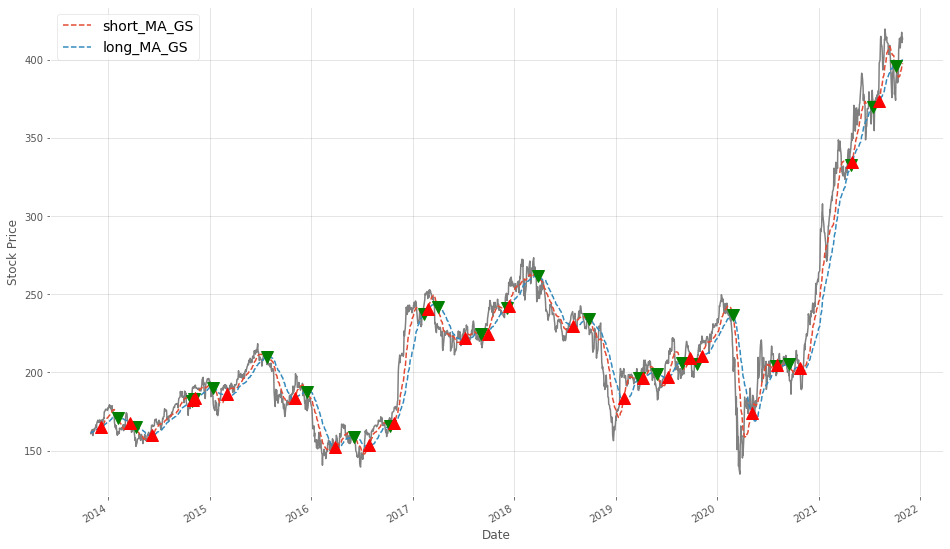

In [25]:
fig = plt.figure(figsize = (16, 10)) # For your plot initialization

sub = fig.add_subplot(111, # For adding a subplot
                      ylabel = "Stock Price")

GS["Close"].plot(ax = sub, # For the closing price
                 color = "grey")

buy_sell[["short_MA_GS", # For Short and Long MA
             "long_MA_GS"]].plot(ax = sub,
                                          style = ["--",
                                                   "--"]
                                         ) 

# Selling
sub.plot(buy_sell.loc[buy_sell['GS positions'] == -1.0].index,
         buy_sell['short_MA_GS'][buy_sell['GS positions'] == -1.0],
         "v",
         markersize = 12,
         color = "green")

# Buying
sub.plot(buy_sell.loc[buy_sell['GS positions'] == 1.0].index,
         buy_sell['short_MA_GS'][buy_sell['GS positions'] == 1.0],
         "^",
         markersize = 12,
         color = "red")

plt.show()

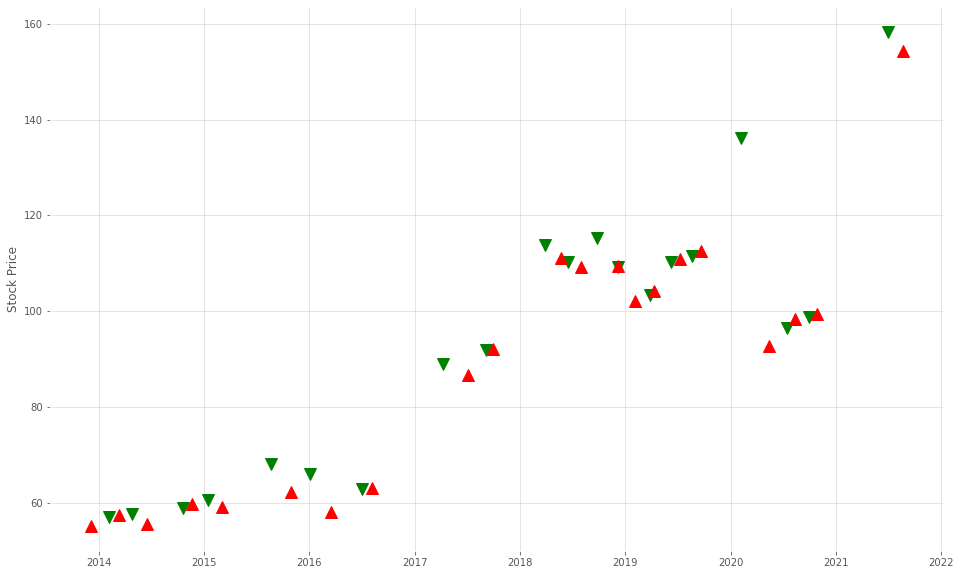

In [29]:
fig1 = plt.figure(figsize = (16, 10)) # For your plot initialization

sub1 = fig1.add_subplot(111, # For adding a subplot
                      ylabel = "Stock Price")

JPM["Close"].plot(ax = sub, # For the closing price
                 color = "black")

buy_sell[["short_MA_JPM", # For Short and Long MA
             "long_MA_JPM"]].plot(ax = sub,
                                          style = ["--",
                                                   "--"]
                                         ) 

# Selling
sub1.plot(buy_sell.loc[buy_sell['JPM positions'] == -1.0].index,
         buy_sell['short_MA_JPM'][buy_sell['JPM positions'] == -1.0],
         "v",
         markersize = 12,
         color = "green")

# Buying
sub1.plot(buy_sell.loc[buy_sell['JPM positions'] == 1.0].index,
         buy_sell['short_MA_JPM'][buy_sell['JPM positions'] == 1.0],
         "^",
         markersize = 12,
         color = "red")

plt.show()

In [34]:
#GS
print(str((buy_sell['short_MA_GS'].max() - buy_sell['short_MA_GS'].min()) / buy_sell['short_MA_GS'].max()))
print(str((buy_sell['long_MA_GS'].max() - buy_sell['long_MA_GS'].min()) / buy_sell['long_MA_GS'].max()))

#JPM
print(str((buy_sell['short_MA_JPM'].max() - buy_sell['short_MA_JPM'].min()) / buy_sell['short_MA_JPM'].max()))
print(str((buy_sell['long_MA_JPM'].max() - buy_sell['long_MA_JPM'].min()) / buy_sell['long_MA_JPM'].max()))

0.6380195124916807
0.6200320367293458
0.6929500294990325
0.6848569726372883


### <font color = red> Answer 6 </font>
    
    As to GS,
    
    The maximum drawdown is about ___63.8%_____ percentage points.
    The longest drawdown period lasts for _____________ days.
    
    As to JPM,
    
    The maximum drawdown is about _____69.3%_______ percentage points.
    The longest drawdown period lasts for _____________ days.
    

###  <font color = blue> 👉 Question 7. </font>  If you had started with a capital of $300,000 for each of the three securities, how much would be left in your account after trading according to your above strategies for `GS` and `JPM`?

### Below are the lines of code that lead to an answer:

In [37]:
def long_or_short(x):
    if x["Adj Close"] < x["LongPoint"]:
        return 1
    elif x["Adj Close"] > x["ShortPoint"]:
        return -1
    else:
        return 0



In [38]:
gs = pdr.get_data_yahoo("GS",
                        start = dt.datetime(2013, 11, 1),
                        end = dt.datetime(2021, 10, 31)
                       )

gs['SMA42'] = gs['Adj Close'].rolling(42).mean()

gs['ShortPoint'] = gs['Adj Close'].rolling(42).mean() + gs['Adj Close'].rolling(42).std() * 2
gs['LongPoint'] = gs['Adj Close'].rolling(42).mean() - gs['Adj Close'].rolling(42).std() * 2

gs["Position"] = 0
gs = gs.dropna()

In [39]:
jpm = pdr.get_data_yahoo("JPM",
                        start = dt.datetime(2013, 11, 1),
                        end = dt.datetime(2021, 10, 31)
                       )

jpm['SMA42'] = jpm['Adj Close'].rolling(42).mean()

jpm['ShortPoint'] = jpm['Adj Close'].rolling(42).mean() + jpm['Adj Close'].rolling(42).std() * 2
jpm['LongPoint'] = jpm['Adj Close'].rolling(42).mean() - jpm['Adj Close'].rolling(42).std() * 2

jpm["Position"] = 0
jpm = jpm.dropna()

In [44]:
gs["Position"] = gs.apply(long_or_short, axis = 1)
gs["our_positions"] = gs["Position"].diff()
difference_in_shares_owned = gs["our_positions"].diff()
gs['portfolioValue'] = gs["Position"] * gs["Adj Close"]
gs["our_holdings"] = (gs["our_positions"].multiply(gs["Adj Close"],axis = 0))
our_capital = 300000
gs["our_cash"] = our_capital - difference_in_shares_owned.multiply(gs["Adj Close"]).cumsum()
gs["total"] = gs["our_cash"] + gs["our_holdings"]
gs['return'] = gs["total"].pct_change()
np.sqrt(253) *gs['return'].mean() / gs['return'].std()

0.15060124146239795

In [45]:
jpm["Position"] = jpm.apply(long_or_short, axis = 1)
jpm["our_positions"] = jpm["Position"].diff()
difference_in_shares_owned = jpm["our_positions"].diff()
jpm['portfolioValue'] = jpm["Position"] * jpm["Adj Close"]
jpm["our_holdinjpm"] = (jpm["our_positions"].multiply(jpm["Adj Close"],axis = 0))
our_capital = 300000
jpm["our_cash"] = our_capital - difference_in_shares_owned.multiply(jpm["Adj Close"]).cumsum()
jpm["total"] = jpm["our_cash"] + jpm["our_holdinjpm"]
jpm['return'] = jpm["total"].pct_change()
np.sqrt(253) *jpm['return'].mean() / jpm['return'].std()

-0.1562104138660079

### <font color = red> Answer 7 </font>

    The answer is ________GS___________________ .

###  <font color = blue> 👉 Question 8. </font> Using the current momentum strategy, how many trading opportunities were there for GS and JPM?

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 8 </font>

    The answer is ____________________________ .

## 👇 Questions 9 and 10 ask you to build, execute, and backtest a strategy using `Supervised Machine Learning (here, classification)`.

###  <font color = blue> 👉 Question 9. </font> Our securities of interest is Nasdaq 100 Index (`qqq`). The time period for analysis is from November 2013 to October 2021.

### Please predict tomorrow’s index level (market movement) from the index levels of the past seven days (including today).

### The machine learning algorithms of choice are `Support Vector Machine`, `Random Forest`, and `Ada Boost`.

### Between the three algorithms, which one shows the greatest overfitting?

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 9 </font>

    The answer is ____________________________ .

###  <font color = blue> 👉 Question 10. </font> Estimate the Sharpe Ratio of your strategies based on the three algorithms.

### Below are the lines of code that lead to an answer:

### <font color = red> Answer 10 </font>

    Support Vector Machine : ____________ 
    
    Random Forest  : ____________ 
     
    Ada Boost  : ____________ 

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊